#### Cross validation on Diabetes dataset from Sklearn

In [62]:
# import libraries
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### References:
1) https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

2) https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [63]:
# load data 
# Declare the columns names
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() 
diabetes = load_diabetes() 
# load the dataset as a pandas data frame
df = pd.DataFrame(diabetes.data, columns=columns) 
y_target = diabetes.target 

In [64]:
# describe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   map     442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [65]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(df, y_target, test_size = 0.2, random_state = 42)
print("Check dimension of train and test datasets: ")
print("Training set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Check dimension of train and test datasets: 
Training set:  (353, 10) (353,)
Test set:  (89, 10) (89,)


In [66]:
# Fitting linear regression
linreg = LinearRegression()
diabetes_model = linreg.fit(X_train, y_train)
y_pred = diabetes_model.predict(X_test)

Text(0, 0.5, 'Expected values')

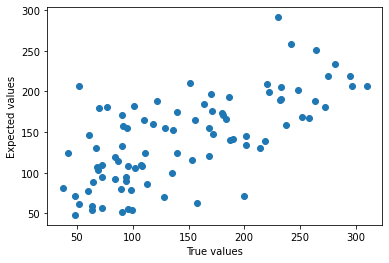

In [67]:
# Plotting y_test and y_pred
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Expected values")

In [68]:
# Accuracy score
print("Accuracy score: ", diabetes_model.score(X_test, y_test))

Accuracy score:  0.45260660216173787


#### Cross validation

##### K-fold
Split the data into k different subsets, use k-1 datasets to train the data, leave the last subset or last fold as test data. Average the model against each of the folds and finalize the model. After that we test the data against the test set.

**Example:**

In [51]:
# import KFold from sklearn
from sklearn.model_selection import KFold
import numpy as np

X = np.array( [[1, 2], [3, 4], [1, 2], [3, 4]] )
y = np.array( [1, 2, 3, 4])
# split into 2 folds
kf = KFold( n_splits = 2 ) 
# returns the number of splitting iterations in cross-validator
kf.get_n_splits(X)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [56]:
print("----K-fold cross validation----")
for train_index, test_index in kf.split(X):
    print("Train set index: ", train_index)
    print("Test set index: ", test_index)
    print("-------------")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

----K-fold cross validation----
Train set index:  [2 3]
Test set index:  [0 1]
-------------
Train set index:  [0 1]
Test set index:  [2 3]
-------------


##### Leave-one-out cross validation

Here, the number of folds(subsets) is equal to the number of observations in the dataset. Then average ALL of these folds and build our model with the average. We then test the model against the last fold. 

This method is computationally expensive, should be used on small datasets. 

**Example:**

In [57]:
from sklearn.model_selection import LeaveOneOut

X = np.array( [[1, 2], [3, 4]] )
y = np.array( [1, 2] )

loocv = LeaveOneOut()
loocv.get_n_splits(X)

print("----Leave-one-out cross validation----")
for train_index, test_index in loocv.split(X):
    print("Train set: ", train_index)
    print("Test set: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("-----------")

----Leave-one-out cross validation----
Train set:  [1]
Test set:  [0]
-----------
Train set:  [0]
Test set:  [1]
-----------


##### Using cross-validation for diabetes dataset

In [59]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [69]:
# Cross validation score for 6 folds
scores = cross_val_score(diabetes_model, df, y_target, cv = 6)
print("Cross validation score: ", scores)

Cross validation score:  [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


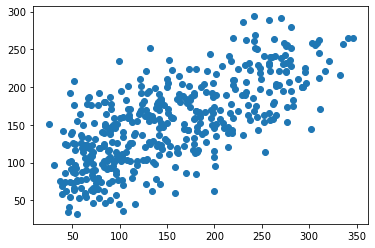

In [71]:
# Cross validated predictions
predictions = cross_val_predict(diabetes_model, df, y_target, cv = 6)
plt.scatter(y_target, predictions)

In [72]:
# Accuracy of model 
print("Cross-prediction accuracy: ", metrics.r2_score(y_target, predictions))

Cross-prediction accuracy:  0.4908065838640775
